### t-SNE plot generation

In [164]:
import pandas as pd
from sklearn.manifold import TSNE, SpectralEmbedding
import numpy as np

In [8]:
import matplotlib.pyplot as plt

SMALL_SIZE = 14
MEDIUM_SIZE = 18
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

In [3]:
vgg_df = pd.read_csv('../wandb_results/vgg_cifar10_wandb_export.csv')

In [5]:
features = ['epochs', 'batch_size', 'learning_rate', 'adam_epsilon']
vgg_X = vgg_df[features].values
vgg_y = vgg_df['accuracy_diff'].values

In [14]:
vgg_X_embedded = SpectralEmbedding(n_components=2).fit_transform(vgg_X)

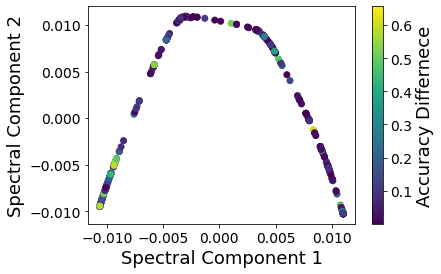

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
img = plt.scatter(vgg_X_embedded[:, 0],vgg_X_embedded[:, 1] , c= vgg_y, cmap="viridis")
fig.colorbar(img, orientation="vertical", label="Accuracy Differnece")
ax.set_xlabel('Spectral Component 1')
ax.set_ylabel('Spectral Component 2')
plt.savefig('vgg_spectral_params.png', bbox_inches="tight", dpi=200)

In [154]:
total_max = np.max([np.max(vgg_mi), np.max(dense_mi), np.max(resnet_mi)])

In [63]:
from sklearn.feature_selection import mutual_info_regression

In [169]:
vgg_df = pd.read_csv('../wandb_results/vgg_cifar10_wandb_export.csv')
features = ['epochs', 'batch_size', 'learning_rate', 'adam_epsilon']
vgg_X = vgg_df[features].values
vgg_y = vgg_df['accuracy_diff'].values
vgg_mi = mutual_info_regression(vgg_X, vgg_y)
vgg_mi /= np.max(vgg_mi)
# vgg_mi /= total_max
vgg_mi

array([0.        , 0.72249302, 0.27475719, 1.        ])

In [179]:
vgg_mi * np.max(vgg_mi)

array([0.        , 0.72249302, 0.27475719, 1.        ])

In [170]:
resnet_df = pd.read_csv('../wandb_results/resnet_cifar10_wandb_export.csv')
features = ['epochs', 'batch_size', 'learning_rate', 'adam_epsilon']
resnet_X = resnet_df[features].values
resnet_y = resnet_df['accuracy_diff'].values
resnet_mi = mutual_info_regression(resnet_X, resnet_y)
resnet_mi /= np.max(resnet_mi)
# resnet_mi /= total_max
resnet_mi

array([0.53647473, 1.        , 0.32110558, 0.48604645])

In [171]:
dense_df = pd.read_csv('../wandb_results/densenet_cifar10_wandb_export.csv')
features = ['epochs', 'batch_size', 'learning_rate', 'adam_epsilon']
dense_X = dense_df[features].values
dense_y = dense_df['accuracy_diff'].values
dense_mi = mutual_info_regression(dense_X, dense_y)
# dense_mi /= total_max
dense_mi /= np.max(dense_mi)
dense_mi

array([1.        , 0.11973598, 0.24962443, 0.12923193])

In [172]:
sum(vgg_mi)

1.9972502051399421

In [188]:
mi_df = pd.DataFrame(columns=['Compared Parameter', 'MI', 'Model'])

In [189]:
mi_df

,Compared Parameter,MI,Model


In [190]:
features_plot = ["Epochs", "Batch Size", "Learning Rate", "Adam Epsilon"]

In [191]:
for i in range(4):
    mi_df = mi_df.append({'MI':vgg_mi[i], 'Compared Parameter': features_plot[i], 'Model':'VGG'}, ignore_index=True)
    mi_df = mi_df.append({'MI':resnet_mi[i], 'Compared Parameter': features_plot[i], 'Model':'ResNet'}, ignore_index=True)
    mi_df = mi_df.append({'MI':dense_mi[i], 'Compared Parameter': features_plot[i], 'Model':'DenseNet'}, ignore_index=True)

In [192]:
mi_df

,Compared Parameter,MI,Model
0,Epochs,0.000000,VGG
1,Epochs,0.536475,ResNet
2,Epochs,1.000000,DenseNet
3,Batch Size,0.722493,VGG
4,Batch Size,1.000000,ResNet
5,Batch Size,0.119736,DenseNet
6,Learning Rate,0.274757,VGG
7,Learning Rate,0.321106,ResNet
8,Learning Rate,0.249624,DenseNet
9,Adam Epsilon,1.000000,VGG


In [193]:
import seaborn as sns

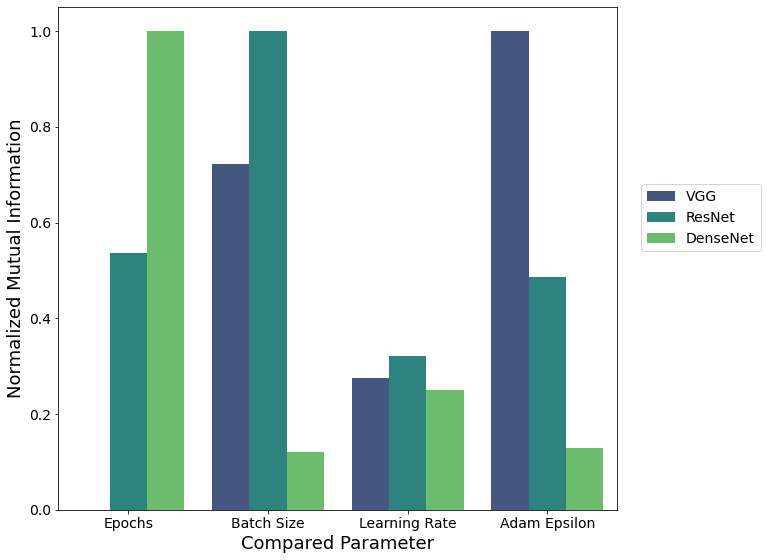

In [227]:
ax = sns.barplot(x="Compared Parameter", y="MI", hue="Model", data=mi_df, palette="viridis")
ax.legend(loc='lower center', fancybox=True, bbox_to_anchor=(1.15, 0.5))
# ax._legend._loc_real = 1
plt.ylabel("Normalized Mutual Information")
fig = plt.gcf()
# fig.legend(loc='upper right')
fig.set_size_inches(11, 8)
plt.tight_layout()
plt.savefig('normalized_mutual_info_sklearn.png', dpi=200, bbox_inches="tight")